In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # numpy arrays / linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # map plot
import warnings
warnings.filterwarnings('ignore') 

import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
from scipy.optimize import curve_fit # predictive modeling
import seaborn as sns
import statsmodels.api as sm

import datetime
from datetime import date

# Top 1 - Sinopharm and Sinovac

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/country_vaccinations.csv', index_col='date', parse_dates=True, engine='python', header=0)
df = df[df['country']=='Indonesia']['total_vaccinations']
df.dropna(inplace=True)
df = df.reset_index()
df.head()

,date,total_vaccinations
0,2021-01-12,0.0
1,2021-01-22,132000.0
2,2021-01-24,149242.0
3,2021-01-25,161959.0
4,2021-01-26,245685.0


In [4]:
df=df.rename(columns={'date':'ds', 'total_vaccinations':'y'})
df.head()

,ds,y
0,2021-01-12,0.0
1,2021-01-22,132000.0
2,2021-01-24,149242.0
3,2021-01-25,161959.0
4,2021-01-26,245685.0


In [5]:
from fbprophet import Prophet
model = Prophet(daily_seasonality=True)
model.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
future = model.make_future_dataframe(periods=60, freq = 'd')
future.tail()

,ds
137,2021-07-01
138,2021-07-02
139,2021-07-03
140,2021-07-04
141,2021-07-05


In [7]:
forecast = model.predict(future)

In [8]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
137,2021-07-01,3.508403e+07,3.097514e+07,3.876066e+07,3.100620e+07,3.885667e+07,-71233.532054,-71233.532054,-71233.532054,-116339.187576,-116339.187576,-116339.187576,45105.655522,45105.655522,45105.655522,0.0,0.0,0.0,3.501280e+07
138,2021-07-02,3.532712e+07,3.108097e+07,3.910619e+07,3.115290e+07,3.918781e+07,-73301.041081,-73301.041081,-73301.041081,-116339.187576,-116339.187576,-116339.187576,43038.146495,43038.146495,43038.146495,0.0,0.0,0.0,3.525382e+07
139,2021-07-03,3.557020e+07,3.122808e+07,3.951627e+07,3.126044e+07,3.948061e+07,-61284.411591,-61284.411591,-61284.411591,-116339.187576,-116339.187576,-116339.187576,55054.775985,55054.775985,55054.775985,0.0,0.0,0.0,3.550892e+07
140,2021-07-04,3.581329e+07,3.112226e+07,3.961614e+07,3.134349e+07,3.987680e+07,-214622.751996,-214622.751996,-214622.751996,-116339.187576,-116339.187576,-116339.187576,-98283.564420,-98283.564420,-98283.564420,0.0,0.0,0.0,3.559867e+07
141,2021-07-05,3.605638e+07,3.129075e+07,3.999965e+07,3.140402e+07,4.021865e+07,-196333.665910,-196333.665910,-196333.665910,-116339.187576,-116339.187576,-116339.187576,-79994.478334,-79994.478334,-79994.478334,0.0,0.0,0.0,3.586004e+07


In [9]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
132,2021-06-26,3.380731e+07,3.025114e+07,3.709325e+07
133,2021-06-27,3.389706e+07,3.026958e+07,3.731167e+07
134,2021-06-28,3.415844e+07,3.045318e+07,3.764861e+07
135,2021-06-29,3.448368e+07,3.066396e+07,3.812023e+07
136,2021-06-30,3.475752e+07,3.079928e+07,3.837233e+07
137,2021-07-01,3.501280e+07,3.097514e+07,3.876066e+07
138,2021-07-02,3.525382e+07,3.108097e+07,3.910619e+07
139,2021-07-03,3.550892e+07,3.122808e+07,3.951627e+07
140,2021-07-04,3.559867e+07,3.112226e+07,3.961614e+07
141,2021-07-05,3.586004e+07,3.129075e+07,3.999965e+07


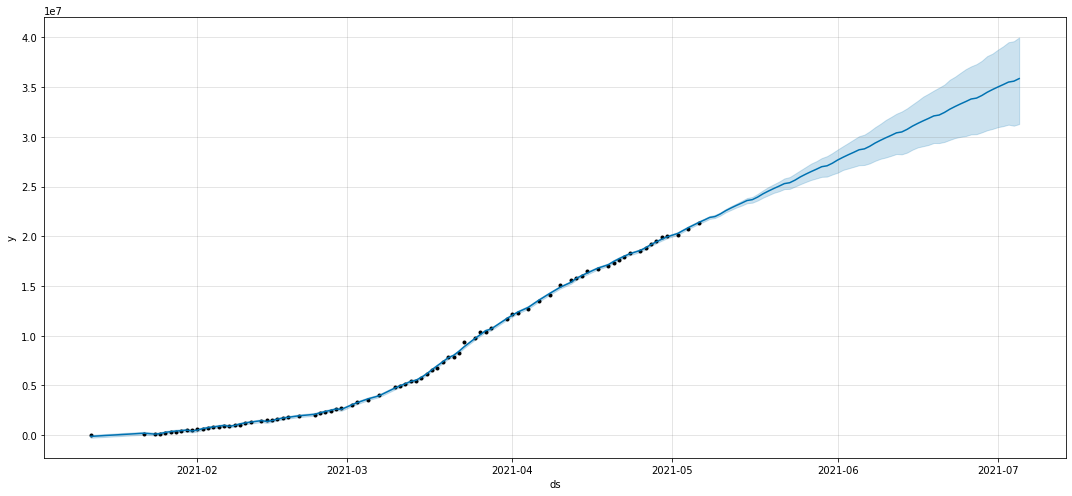

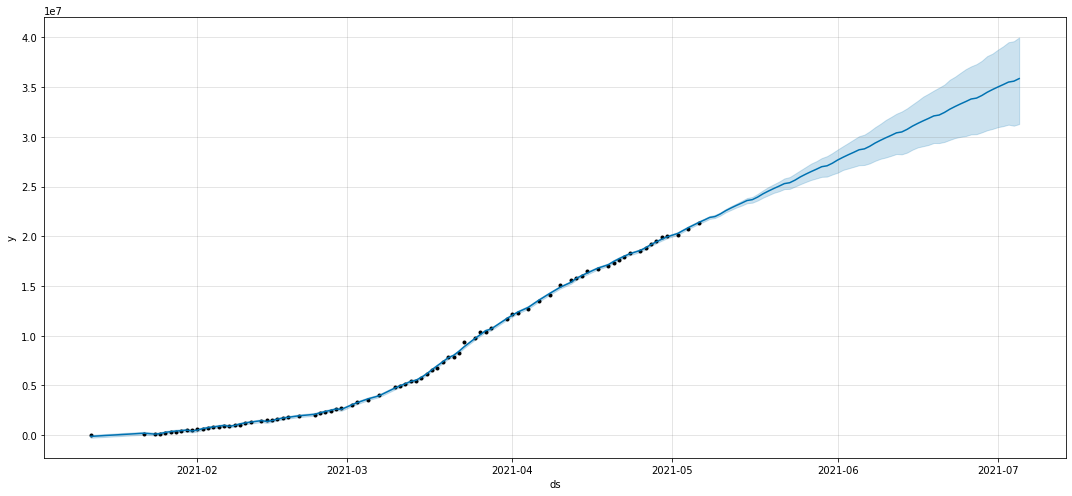

In [10]:
model.plot(forecast, figsize=(15,7))

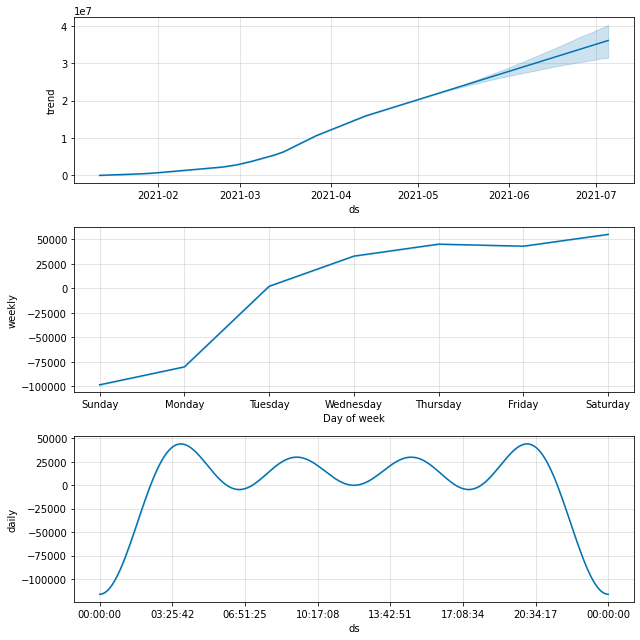

In [11]:
model.plot_components(forecast);

In [12]:
metric_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds').y).reset_index()

In [13]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,yhat_lower,yhat_upper,y
77,2021-04-29,1.969836e+07,1.955696e+07,1.985028e+07,19890198.0
78,2021-04-30,1.993938e+07,1.979447e+07,2.008535e+07,20068537.0
79,2021-05-02,2.028423e+07,2.013788e+07,2.042362e+07,20172516.0
80,2021-05-04,2.087085e+07,2.073125e+07,2.101529e+07,20701804.0
81,2021-05-06,2.139996e+07,2.125624e+07,2.154747e+07,21367754.0


In [14]:
from sklearn.metrics import r2_score
r2_score(metric_df.y, metric_df.yhat)

0.9997412452159284

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(metric_df.y, metric_df.yhat)

12666058110.502552

In [16]:
metric_df.yhat.mean()

7617697.355930631

In [17]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(metric_df.y, metric_df.yhat))

84543.05844187175


In [18]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(metric_df.y, metric_df.yhat))

66004.07242192607


In [19]:
from math import sqrt
rmse = sqrt(mean_squared_error(metric_df.y, metric_df.yhat))
print(rmse)

112543.58316004761
